In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("immo_data.csv")

In [3]:
data.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [4]:
deleted_list = [ "heatingType", "telekomTvOffer", "telekomHybridUploadSpeed", "picturecount", "pricetrend", 
                "telekomUploadSpeed", "scoutId", "noParkSpaces", "firingTypes", "geo_bln", "yearConstructedRange",
               "houseNumber", "geo_krs","condition", "interiorQual", "petsAllowed","street", "streetPlain", "lift", 
                "baseRentRange","geo_plz", "thermalChar", "floor", "numberOfFloors", "noRoomsRange", 
                "livingSpaceRange", "regio3", "description", "facilities", "heatingCosts",
                "energyEfficiencyClass", "lastRefurbish",
               "electricityBasePrice", "electricityKwhPrice"]

In [5]:
data.drop(deleted_list, axis=1, inplace=True)

In [6]:
Berlin_data = data[data["regio2"] == "Berlin" ]
Hamburg_data = data[data["regio2"] == "Hamburg" ]
Munchen_data = data[data["regio2"] == "München" ]

In [7]:
def nan_counter(df):
    remaining_nan = {}
    for column in df.columns:
        remaining_nan[column] = df[column][df[column].isna() == True].size
    return remaining_nan

In [8]:
## We check the NaN values and we decided to fix them.
nan_counter(Hamburg_data)

{'serviceCharge': 91,
 'newlyConst': 0,
 'balcony': 0,
 'totalRent': 364,
 'yearConstructed': 508,
 'hasKitchen': 0,
 'cellar': 0,
 'baseRent': 0,
 'livingSpace': 0,
 'typeOfFlat': 319,
 'noRooms': 0,
 'garden': 0,
 'regio2': 0,
 'date': 0}

In [174]:
## We decided that values more than 1000 for serviceCharge are outliers so made filter.
Hamburg_data = Hamburg_data[Hamburg_data["serviceCharge"] < 1000]

In [178]:
Hamburg_data.shape

(3654, 14)

<AxesSubplot:>

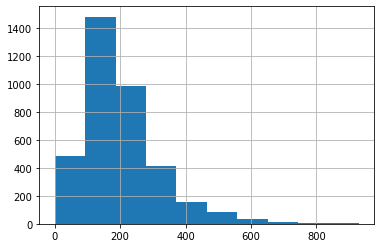

In [176]:
Hamburg_data.serviceCharge.hist()